In [55]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%pylab inline 
import re 
import syllables

Populating the interactive namespace from numpy and matplotlib


In [4]:
traindata = '..\\commonlitreadabilityprize\\train.csv'

In [5]:
data = pd.read_csv(traindata)

In [6]:
data.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [7]:
data.shape

(2834, 6)

In [59]:
# get number of sentences.
def get_num_sentence(x): 
    return len(x.split("."))

def getAverageSentenceLength(x): 
    return mean([len(i.split()) for i in x.split('.')])

def FKGrade(x):
    """
    flesch kincaid grade for each passage.
    https://en.wikipedia.org/wiki/Flesch–Kincaid_readability_tests#
    """
    total_words = len(x.split(' '))
    x_ = re.sub("\?|\.|\!", '.', x)
    total_sentences = len(x_.split('.?'))
    total_syllables = sum([slb.estimate(i) for i in x_.split(' ')])
    out = 206.835 - 1.015  * (total_words / total_sentences) - 84.6 * (total_syllables / total_words) 
    return out 


data['num_sentences'] = data['excerpt'].apply(get_num_sentence)
data['avg_sentence_len'] = data['excerpt'].apply(getAverageSentenceLength)

<AxesSubplot:xlabel='num_sentences', ylabel='target'>

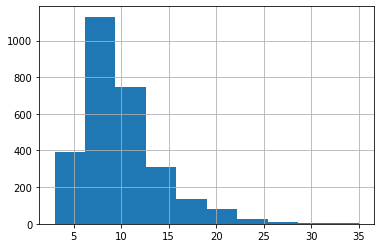

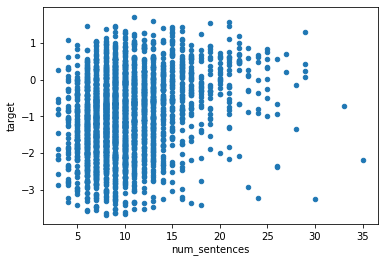

In [23]:
data['num_sentences'].hist()
(data[['target', 'num_sentences']]
    .plot(x='num_sentences', y= 'target', kind = 'scatter'))

<AxesSubplot:xlabel='avg_sentence_len', ylabel='target'>

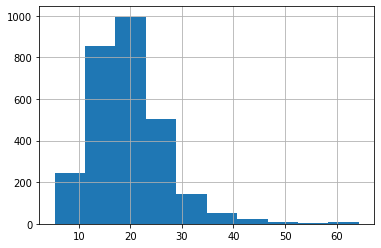

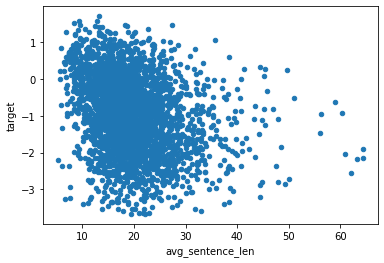

In [25]:
data['avg_sentence_len'].hist()
(data[['target', 'avg_sentence_len']]
    .plot(x='avg_sentence_len', y= 'target', kind = 'scatter'))

$\displaystyle 0.39\left({\frac {\mbox{total words}}{\mbox{total sentences}}}\right)+11.8\left({\frac {\mbox{total syllables}}{\mbox{total words}}}\right)-15.59}$





In [60]:
data['fk_grade'] = data['excerpt'].apply(FKGrade)

<AxesSubplot:xlabel='fk_grade', ylabel='target'>

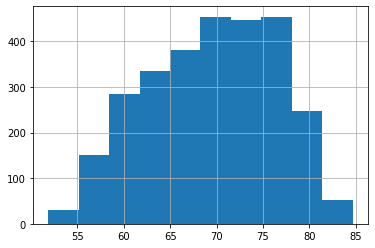

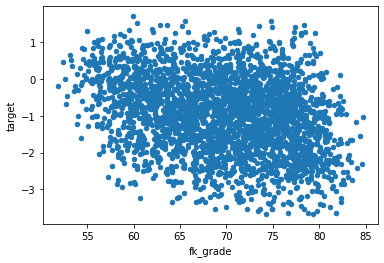

In [57]:
data['fk_grade'].hist()
(data[['target', 'fk_grade']]
    .plot(x='fk_grade',
             y= 'target', kind = 'scatter'))

In [62]:
data.to_csv('tmp.csv', index = None)